In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv("Cleaned_Data.csv")

In [3]:
data

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,'License Plate Front Mount Package','501A Mid Equipment Group','Appearance and Protection Package','5th Wheel','Quiet Package','Graphics Package','King Ranch Package','Z 71 Package','601A Luxury Equipment Group',Distances
0,1.119031,0.778467,-0.569755,-1.100101,True,0.176002,-0.605109,-1.166880,1.038934,-0.437864,...,0,0,0,0,0,0,0,0,0,-0.408171
1,0.307910,-0.638786,-0.273349,1.000640,True,-0.745641,0.643429,1.223815,-0.485437,1.060842,...,0,0,0,0,0,0,0,0,0,-0.395321
2,-0.016538,-0.756891,-0.671644,-0.299819,True,-0.178476,0.263439,0.239411,-1.178333,0.171780,...,0,0,0,0,0,0,0,0,0,-0.406081
3,0.835139,0.187945,-0.653119,-0.599925,True,-0.816537,-0.387972,0.292147,-0.346858,0.324190,...,0,0,0,0,0,0,0,0,0,2.215773
4,-0.624878,-0.874995,-0.616068,1.000640,True,-0.887432,1.104845,1.012872,-0.901175,0.717918,...,0,0,0,0,0,0,0,0,0,-0.406489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-1.679334,1.132780,-0.634594,-1.000066,True,0.034211,-1.392231,-1.166880,1.454671,-1.352328,...,0,0,0,0,0,0,0,0,0,-0.392954
199996,0.064574,0.306049,-0.606805,-0.099748,True,-0.745641,-0.686535,0.573406,0.623196,-0.298154,...,0,0,0,0,0,0,0,0,0,-0.401373
199997,-0.787102,0.306049,-0.328925,-1.200137,True,-0.887432,-0.822246,0.204254,0.068879,-1.123712,...,0,0,0,0,0,0,0,0,0,-0.295270
199998,-0.097650,-0.638786,-0.625331,0.400428,True,-0.532954,0.751997,-1.043829,-0.485437,1.060842,...,0,0,0,0,0,0,0,0,0,-0.402766


In [4]:
train_data = data.iloc[0:150000]

In [5]:
train_label =train_data["price"]

In [6]:
train_data= train_data.drop("price", axis = 1)

In [7]:
import sklearn

In [8]:
from sklearn.neural_network import MLPRegressor

In [9]:
data_set = data
data_label = data["price"]
data_set.drop("price", axis = 1, inplace = True)

In [10]:
data_label

0         26650.0
1         29345.0
2         13950.0
3         31028.0
4         21525.0
           ...   
199995    16005.0
199996    25597.0
199997    16935.0
199998    22499.0
199999    25765.0
Name: price, Length: 200000, dtype: float64

In [11]:
scores = []

In [12]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [13]:
for i in range(10,110, 10):
    print(i)
    regr = MLPRegressor(random_state = 1,learning_rate_init = 0.01,hidden_layer_sizes= [i])
    s = cross_validate(regr, data_set, data_label, cv = 3,  return_train_score= True)
    scores.append((s, i))

10
20
30
40
50
60
70
80
90
100


In [14]:
scores

[({'fit_time': array([1107.47007608,  927.77981114,  917.06501937]),
   'score_time': array([0.69033027, 0.73529744, 0.61861467]),
   'test_score': array([0.92191915, 0.89770764, 0.92866012]),
   'train_score': array([0.94108848, 0.94859675, 0.94277742])},
  10),
 ({'fit_time': array([1162.98907232, 1151.01159143, 1091.11411667]),
   'score_time': array([0.83457971, 0.87392569, 0.81873322]),
   'test_score': array([0.92286575, 0.89823241, 0.93162853]),
   'train_score': array([0.95035765, 0.95350173, 0.95394264])},
  20),
 ({'fit_time': array([1248.79360151, 1202.80740881, 1246.63635612]),
   'score_time': array([0.85685611, 0.76330924, 0.86426497]),
   'test_score': array([0.9258861 , 0.902369  , 0.92839645]),
   'train_score': array([0.95834978, 0.96293309, 0.95875642])},
  30),
 ({'fit_time': array([1400.83214927, 1354.43656349, 1358.0811646 ]),
   'score_time': array([0.93820357, 0.76583719, 0.80544758]),
   'test_score': array([0.92582443, 0.90080596, 0.93016957]),
   'train_score

In [20]:
avg_train_score = []
avg_test_score = []
for i in range(0, 10):
    avg_train_score.append(np.mean(scores[i][0]["train_score"]))
    avg_test_score.append(np.mean(scores[i][0]["test_score"]))

In [26]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.7 MB/s eta 0:00:00 MB/s eta 0:00:01m:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


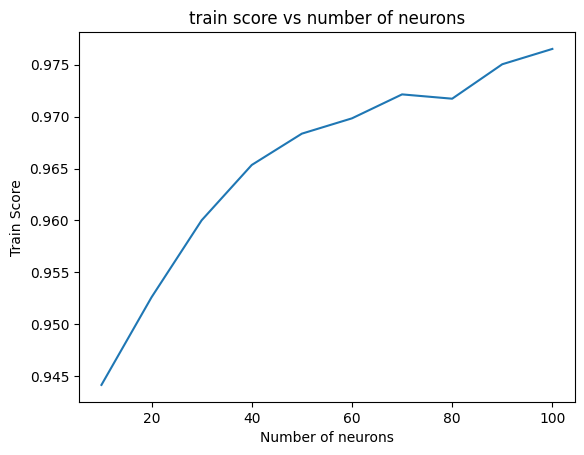

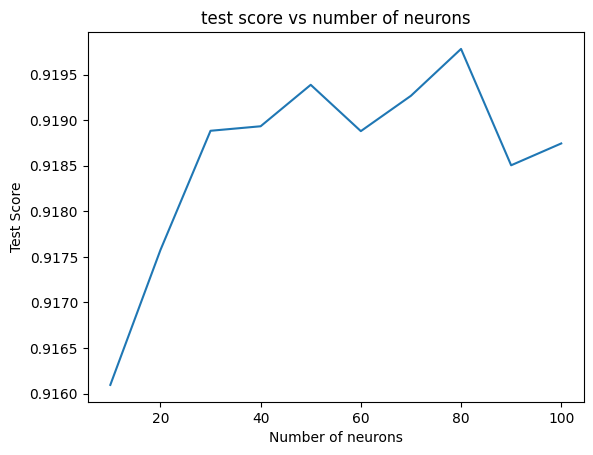

In [30]:
import matplotlib.pyplot as plt
x = [10,20,30,40,50,60,70,80,90,100]
plt.plot(x, avg_train_score)
plt.title("train score vs number of neurons")
 
# Labeling the axes
plt.xlabel("Number of neurons")
plt.ylabel("Train Score")
plt.show()
plt.plot(x, avg_test_score)
plt.title("test score vs number of neurons")
 
# Labeling the axes
plt.xlabel("Number of neurons")
plt.ylabel("Test Score")
plt.show()

From the above graphs, we see that the  model began to verfit at 60 neurons. So, we will choose only 50 neurons in our model.

Trainging the model using different activation function

In [31]:
activation_functions_scores = []

In [32]:
regr = MLPRegressor(random_state = 1,activation = "relu",learning_rate_init = 0.01,hidden_layer_sizes= [50])
s = cross_validate(regr, data_set, data_label, cv = 3,  return_train_score= True)
scores.append((s, "Relu"))

In [33]:
regr = MLPRegressor(random_state = 1,activation = "identity",learning_rate_init = 0.01,hidden_layer_sizes= [50])
s = cross_validate(regr, data_set, data_label, cv = 3,  return_train_score= True)
scores.append((s, "identity"))

In [34]:
regr = MLPRegressor(random_state = 1,activation = "logistic",learning_rate_init = 0.01,hidden_layer_sizes= [50])
s = cross_validate(regr, data_set, data_label, cv = 3,  return_train_score= True)
scores.append((s, "logistic"))

In [35]:
regr = MLPRegressor(random_state = 1,activation = "tanh",learning_rate_init = 0.01,hidden_layer_sizes= [50])
s = cross_validate(regr, data_set, data_label, cv = 3,  return_train_score= True)
scores.append((s, "tanh"))

In [36]:
scores

[({'fit_time': array([1107.47007608,  927.77981114,  917.06501937]),
   'score_time': array([0.69033027, 0.73529744, 0.61861467]),
   'test_score': array([0.92191915, 0.89770764, 0.92866012]),
   'train_score': array([0.94108848, 0.94859675, 0.94277742])},
  10),
 ({'fit_time': array([1162.98907232, 1151.01159143, 1091.11411667]),
   'score_time': array([0.83457971, 0.87392569, 0.81873322]),
   'test_score': array([0.92286575, 0.89823241, 0.93162853]),
   'train_score': array([0.95035765, 0.95350173, 0.95394264])},
  20),
 ({'fit_time': array([1248.79360151, 1202.80740881, 1246.63635612]),
   'score_time': array([0.85685611, 0.76330924, 0.86426497]),
   'test_score': array([0.9258861 , 0.902369  , 0.92839645]),
   'train_score': array([0.95834978, 0.96293309, 0.95875642])},
  30),
 ({'fit_time': array([1400.83214927, 1354.43656349, 1358.0811646 ]),
   'score_time': array([0.93820357, 0.76583719, 0.80544758]),
   'test_score': array([0.92582443, 0.90080596, 0.93016957]),
   'train_score

From the above values, the Relu activation function is the best.

Training the Model

In [4]:
Train_set = data.iloc[1:150000]
Train_label = Train_set["price"]
Train_set.drop("price", axis = 1, inplace = True)

In [5]:
Test_set = data.iloc[150000:]
Test_label = Test_set["price"]
Test_set.drop("price", axis = 1, inplace = True)

In [6]:
Test_set

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,'License Plate Front Mount Package','501A Mid Equipment Group','Appearance and Protection Package','5th Wheel','Quiet Package','Graphics Package','King Ranch Package','Z 71 Package','601A Luxury Equipment Group',Distances
150000,-0.016538,-0.166368,1.653292,-0.599925,True,-1.171015,-0.252261,-0.428577,-0.069700,-0.475966,...,0,0,0,0,0,0,0,0,0,-0.403458
150001,0.064574,0.187945,-0.013993,-0.099748,True,-0.745641,-0.686535,0.573406,0.346038,-0.298154,...,0,0,0,0,0,0,0,0,0,-0.387679
150002,-3.139351,1.014676,-0.541967,-0.599925,True,-0.036685,-1.039383,-1.166880,1.454671,-0.742685,...,0,0,0,0,0,0,0,0,0,0.102168
150003,-0.827658,0.069840,-0.403026,-0.199784,True,2.444663,0.399150,-1.061408,0.623196,-0.526770,...,0,0,0,0,0,0,0,0,0,-0.403254
150004,0.754026,-0.166368,-0.569755,-0.599925,True,-1.171015,-0.197977,0.063625,-0.208279,0.133677,...,0,0,0,0,0,0,0,0,0,-0.401843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-1.679334,1.132780,-0.634594,-1.000066,True,0.034211,-1.392231,-1.166880,1.454671,-1.352328,...,0,0,0,0,0,0,0,0,0,-0.392954
199996,0.064574,0.306049,-0.606805,-0.099748,True,-0.745641,-0.686535,0.573406,0.623196,-0.298154,...,0,0,0,0,0,0,0,0,0,-0.401373
199997,-0.787102,0.306049,-0.328925,-1.200137,True,-0.887432,-0.822246,0.204254,0.068879,-1.123712,...,0,0,0,0,0,0,0,0,0,-0.295270
199998,-0.097650,-0.638786,-0.625331,0.400428,True,-0.532954,0.751997,-1.043829,-0.485437,1.060842,...,0,0,0,0,0,0,0,0,0,-0.402766


In [28]:
regr = MLPRegressor(max_iter = 1000,random_state = 1,activation = "relu",learning_rate_init = 0.001,hidden_layer_sizes= [50])

In [30]:
regr.fit(Train_set, Train_label)

MLPRegressor(hidden_layer_sizes=[50], max_iter=1000, random_state=1)

In [31]:
predictions = regr.predict(Test_set)

In [32]:
predictions[0:10]

array([36082.80892985, 29195.06250284, 23205.89947147, 16293.72663287,
       45758.25567821, 23496.07201687, 21391.10727003, 40688.02467441,
       30774.68215932, 30004.11668301])

In [20]:
Test_label.iloc[0:10]

150000    38570.0
150001    27997.0
150002    22487.0
150003    17992.0
150004    52870.0
150005    24500.0
150006    20597.0
150007    39687.0
150008    26741.0
150009    30180.0
Name: price, dtype: float64

In [17]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Test_label, predictions)

0.9349553813261707

In [41]:
len(regr.coefs_[1][0])

1

In [13]:
data.columns

Index(['back_legroom', 'city_fuel_economy', 'daysonmarket',
       'engine_displacement', 'franchise_dealer', 'front_legroom',
       'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower',
       ...
       ''License Plate Front Mount Package'', ''501A Mid Equipment Group'',
       ''Appearance and Protection Package'', ''5th Wheel'', ''Quiet Package'',
       ''Graphics Package'', ''King Ranch Package'', ''Z 71 Package'',
       ''601A Luxury Equipment Group'', 'Distances'],
      dtype='object', length=1699)

In [12]:
"longitude" in data.columns

False

In [14]:
d = pd.read_csv("Final_Sample.csv")

In [15]:
len(d["city"].unique())

4188